Matplotlib Version: 3.8.2
Matplotlib Installation Directory: c:\Users\win\anaconda3\envs\Ai_proj\Lib\site-packages\matplotlib\__init__.py
Matplotlib Configuration Directory: C:\Users\win\.matplotlib
Matplotlib Cache Directory: C:\Users\win\.matplotlib
Data types of each column:
Unnamed: 0     int64
연령            object
성별            object
상황키워드         object
신체질환          object
감정_대분류        object
감정_소분류        object
사람문장1         object
시스템문장1        object
사람문장2         object
시스템문장2        object
사람문장3         object
시스템문장3        object
dtype: object

DataFrame Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51630 entries, 0 to 51629
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  51630 non-null  int64 
 1   연령          51630 non-null  object
 2   성별          51630 non-null  object
 3   상황키워드       51630 non-null  object
 4   신체질환        51630 non-null  object
 5   감정_대분류      51630 no

C:\Users\win\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\win\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\win\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\win\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45804 (\N{HANGUL SYLLABLE DAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\win\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from

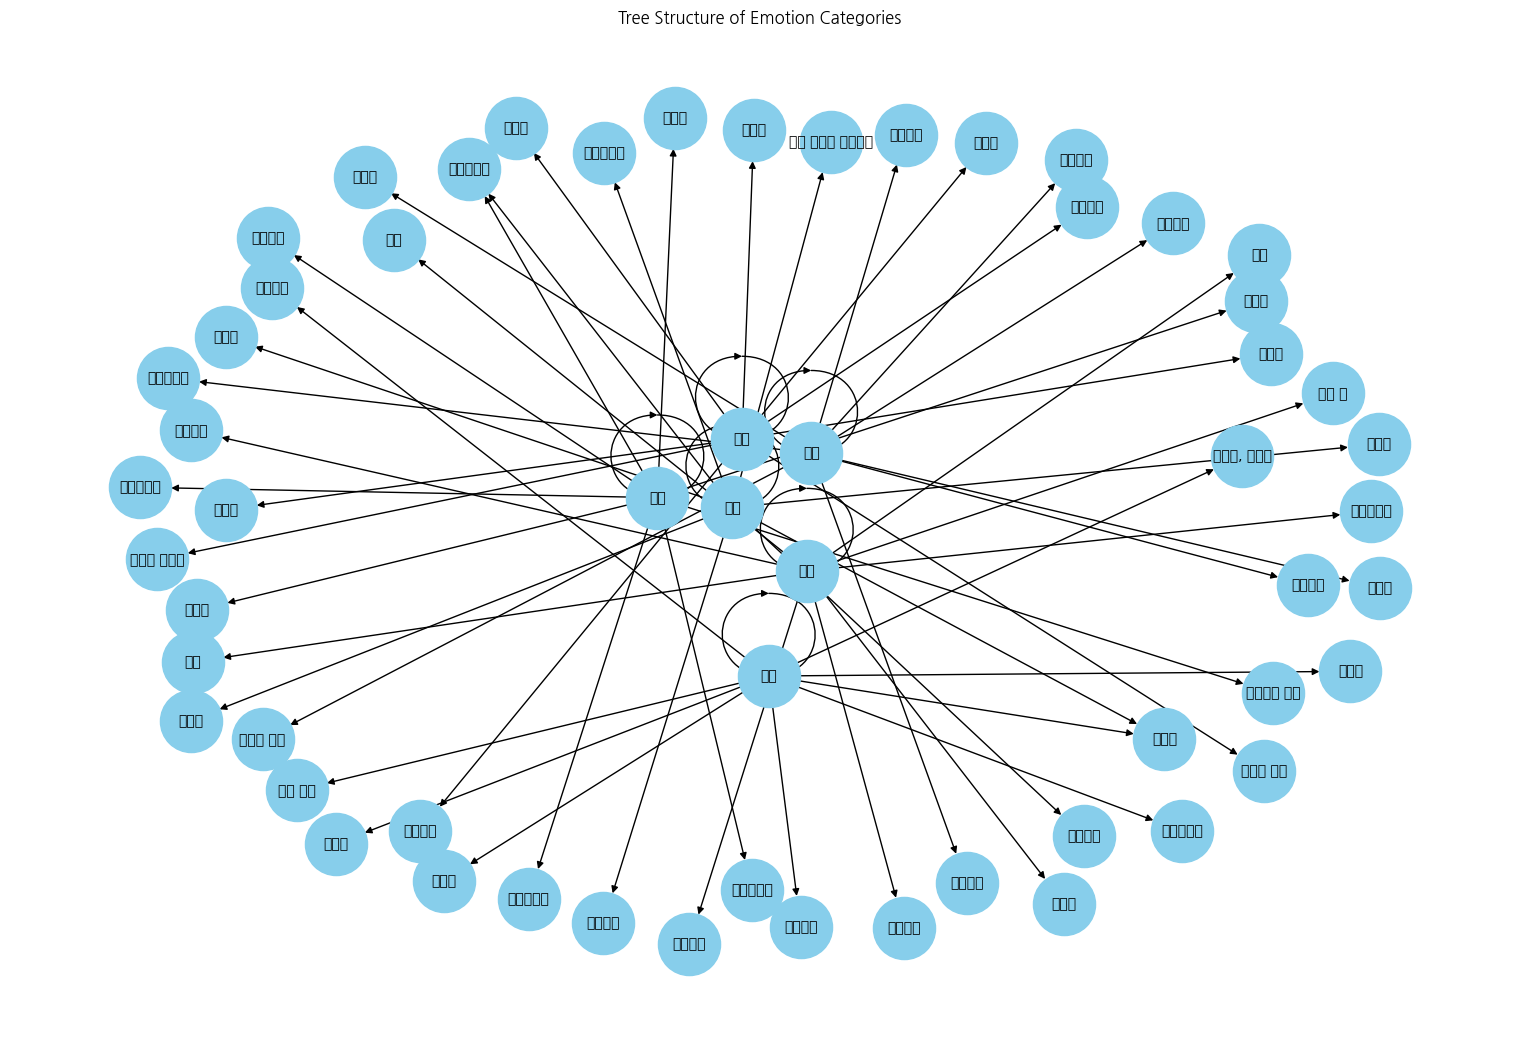

In [3]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib as mpl

# Update matplotlib's settings to use a font that supports Korean
mpl.rcParams['font.family'] = 'NanumGothic'

print("Matplotlib Version:", mpl.__version__)
print("Matplotlib Installation Directory:", mpl.__file__)
print("Matplotlib Configuration Directory:", mpl.get_configdir())
print("Matplotlib Cache Directory:", mpl.get_cachedir())

# Load the dataset
file_path = 'C:\\Users\\win\Documents\\GitHub\\-Ai\\감성대화말뭉치(최종데이터)_Training.csv'
data = pd.read_csv(file_path, encoding='utf-8')
# Using dtypes to get the data type of each column
print("Data types of each column:")
print(data.dtypes)

# Using info() to get a summary including data types
print("\nDataFrame Summary:")
data.info()

# Extracting the relevant columns
emotion_major = data['감정_대분류']
emotion_subcategory = data['감정_소분류']

# Creating a dictionary to map major emotion categories to their subcategories
emotion_tree = defaultdict(set)
for major, sub in zip(emotion_major, emotion_subcategory):
    emotion_tree[major].add(sub)

# Creating a network graph from the tree structure
G = nx.DiGraph()
for major in emotion_tree:
    G.add_node(major)
    for sub in emotion_tree[major]:
        G.add_node(sub)
        G.add_edge(major, sub)

# Plotting the tree
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10)
plt.title("Tree Structure of Emotion Categories")
plt.show()

In [4]:
# '감정_대분류'에 대한 고유값 확인

In [5]:
data['감정_대분류'].value_counts()

감정_대분류
불안    9320
분노    9160
상처    9143
슬픔    9125
당황    8756
기쁨    6126
Name: count, dtype: int64

In [6]:
# '감정_소분류'에 대한 고유값 확인

In [7]:
data['감정_소분류'].value_counts()

감정_소분류
고립된            1802
혼란스러운          1771
걱정스러운          1229
짜증내는           1054
우울한            1002
눈물이 나는          993
두려운             991
억울한             984
노여워하는           975
스트레스 받는         971
성가신             969
분노              958
슬픔              958
괴로워하는           953
비통한             950
가난한, 불우한        949
상처              937
툴툴대는            926
한심한             918
배신당한            911
충격 받은           910
후회되는            906
초조한             900
부끄러운            897
낙담한             896
질투하는            896
불안              893
환멸을 느끼는         884
죄책감의            883
구역질 나는          882
좌절한             875
안달하는            873
남의 시선을 의식하는     872
실망한             870
조심스러운           869
외로운             865
취약한             864
버려진             861
회의적인            860
열등감             859
당황              859
악의적인            845
당혹스러운           842
희생된             840
마비된             838
혐오스러운           833
염세적인            828
방어적인            803
기쁨              660
만족스러운        